In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

In [15]:
housecal = fetch_california_housing()

In [16]:
housecal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [17]:
housecal.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [18]:
print(housecal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [19]:
housecal = pd.DataFrame(data = fetch_california_housing().data, columns =fetch_california_housing().feature_names )
housecal['target'] = fetch_california_housing().target
housecal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Réseau Dense

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(housecal.values, housecal.target,
#                                                    test_size=0.20,
#                                                    random_state=42,
#                                                    shuffle=True)

# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
#                                                    test_size=0.10,
#                                                    shuffle=True)

In [21]:
housecal = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housecal.data,housecal.target,test_size=0.2,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
# scaler = StandardScaler()

# X_trains = scaler.fit_transform(X_train)
# X_tests = scaler.transform(X_test)
# X_valids = scaler.transform(X_valid)

In [24]:
model = Sequential()
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))

model.add(Dense(1, activation='linear'))
learning_rate=1e-4

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [25]:
#sgd_optimizer = optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)

#model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50,  verbose=2, validation_split=0.2)

Train on 13209 samples, validate on 3303 samples
Epoch 1/20
 - 1s - loss: 2.2186 - mean_squared_error: 2.2186 - val_loss: 0.7965 - val_mean_squared_error: 0.7965
Epoch 2/20
 - 0s - loss: 0.7494 - mean_squared_error: 0.7494 - val_loss: 0.6343 - val_mean_squared_error: 0.6343
Epoch 3/20
 - 0s - loss: 0.5872 - mean_squared_error: 0.5872 - val_loss: 0.5428 - val_mean_squared_error: 0.5428
Epoch 4/20
 - 0s - loss: 0.4961 - mean_squared_error: 0.4961 - val_loss: 0.5078 - val_mean_squared_error: 0.5078
Epoch 5/20
 - 0s - loss: 0.4519 - mean_squared_error: 0.4519 - val_loss: 0.4633 - val_mean_squared_error: 0.4633
Epoch 6/20
 - 0s - loss: 0.4282 - mean_squared_error: 0.4282 - val_loss: 0.4404 - val_mean_squared_error: 0.4404
Epoch 7/20
 - 0s - loss: 0.4123 - mean_squared_error: 0.4123 - val_loss: 0.4256 - val_mean_squared_error: 0.4256
Epoch 8/20
 - 0s - loss: 0.4034 - mean_squared_error: 0.4034 - val_loss: 0.4167 - val_mean_squared_error: 0.4167
Epoch 9/20
 - 0s - loss: 0.3933 - mean_squared_

In [27]:
#The evaluate method calculates the losses and metrics
#     for the trained model
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

4128/4128 [==============================] - 0s 5us/step


In [28]:
# #The predict method applies the trained model to inputs
# #     to generate outputs
# classes = model.predict(X_test, batch_size=128)

In [11]:
# seed = 7
# np.random.seed(seed)
# # evaluate model with standardized dataset
# estimator = KerasRegressor(build_fn=model, epochs=10, batch_size=5, verbose=0)

In [11]:
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, Y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

#  Neural Network Regressor

In [29]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(8, input_dim=8))
    regressor.add(Dense(1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse'])
    return regressor

In [30]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100,verbose=2)

In [31]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
 - 1s - loss: 3.1442 - mean_squared_error: 3.1442
Epoch 2/100
 - 0s - loss: 0.8625 - mean_squared_error: 0.8625
Epoch 3/100
 - 0s - loss: 0.6787 - mean_squared_error: 0.6787
Epoch 4/100
 - 0s - loss: 0.5974 - mean_squared_error: 0.5974
Epoch 5/100
 - 0s - loss: 0.5551 - mean_squared_error: 0.5551
Epoch 6/100
 - 0s - loss: 0.5396 - mean_squared_error: 0.5396
Epoch 7/100
 - 0s - loss: 0.5319 - mean_squared_error: 0.5319
Epoch 8/100
 - 0s - loss: 0.5310 - mean_squared_error: 0.5310
Epoch 9/100
 - 0s - loss: 0.5281 - mean_squared_error: 0.5281
Epoch 10/100
 - 0s - loss: 0.5301 - mean_squared_error: 0.5301
Epoch 11/100
 - 0s - loss: 0.5278 - mean_squared_error: 0.5278
Epoch 12/100
 - 0s - loss: 0.5303 - mean_squared_error: 0.5303
Epoch 13/100
 - 0s - loss: 0.5303 - mean_squared_error: 0.5303
Epoch 14/100
 - 0s - loss: 0.5309 - mean_squared_error: 0.5309
Epoch 15/100
 - 0s - loss: 0.5310 - mean_squared_error: 0.5310
Epoch 16/100
 - 0s - loss: 0.5281 - mean_squared_error: 0.5281
E

In [32]:
y_pred= regressor.predict(X_test)

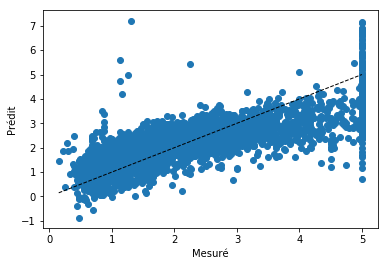

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Mesuré')
ax.set_ylabel('Prédit')
plt.show()